<a href="https://colab.research.google.com/github/taristadwi/PCVK_SEMESTER-5/blob/main/Jobsheet7_Tarista_Dwi_Silvia_2141720014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAMA:Tarista Dwi Silvia**

# **NIM:2141720014**

# **KELAS:TI-3A**


---



---



---



1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.
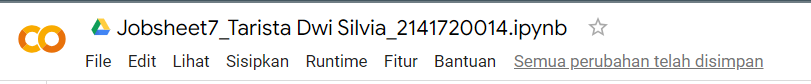

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

# **Konfulasi tanpa Library**
**Membuat fungsi konvulasi**

Fungsi konvolusi yang dibuat memiliki parameter berupa:

citra masukan,
kernel berupa matriks untuk memfilter citra,
nilai stride / besarnya pergeseran untuk setiap konvolusi,
nilai pad yang akan ditambakan pada citra
d. Load citra yang akan diproses dan ubah menjadi citra keabuan

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

In [3]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [4]:
img_m = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

3.Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

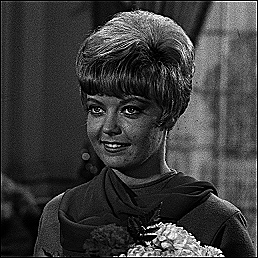

In [5]:

# SHARPEN

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

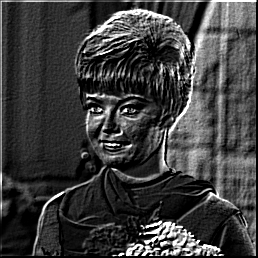

In [6]:
# EMBOS

kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

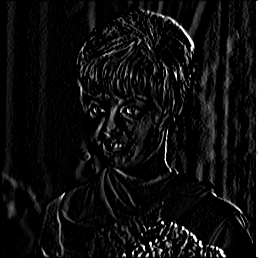

In [7]:
# Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

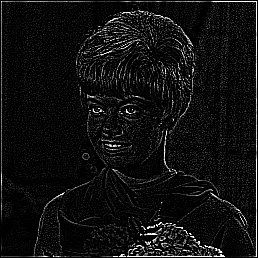

In [8]:
# Canny edge Detection

kernel_edge = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

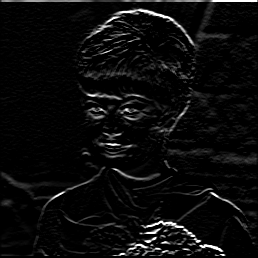

In [10]:
#prewitt filter
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

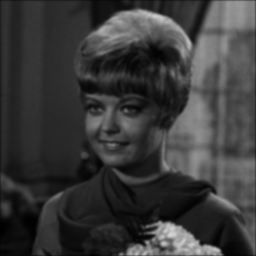

In [11]:
# Gaussian Blur 5x5
kernel_gaussian5 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
cv2_imshow(convolution2d(img_gray, kernel_gaussian5, 1, 2))

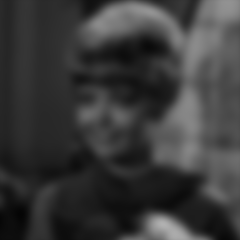

In [9]:
# 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

# **Tugas**

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

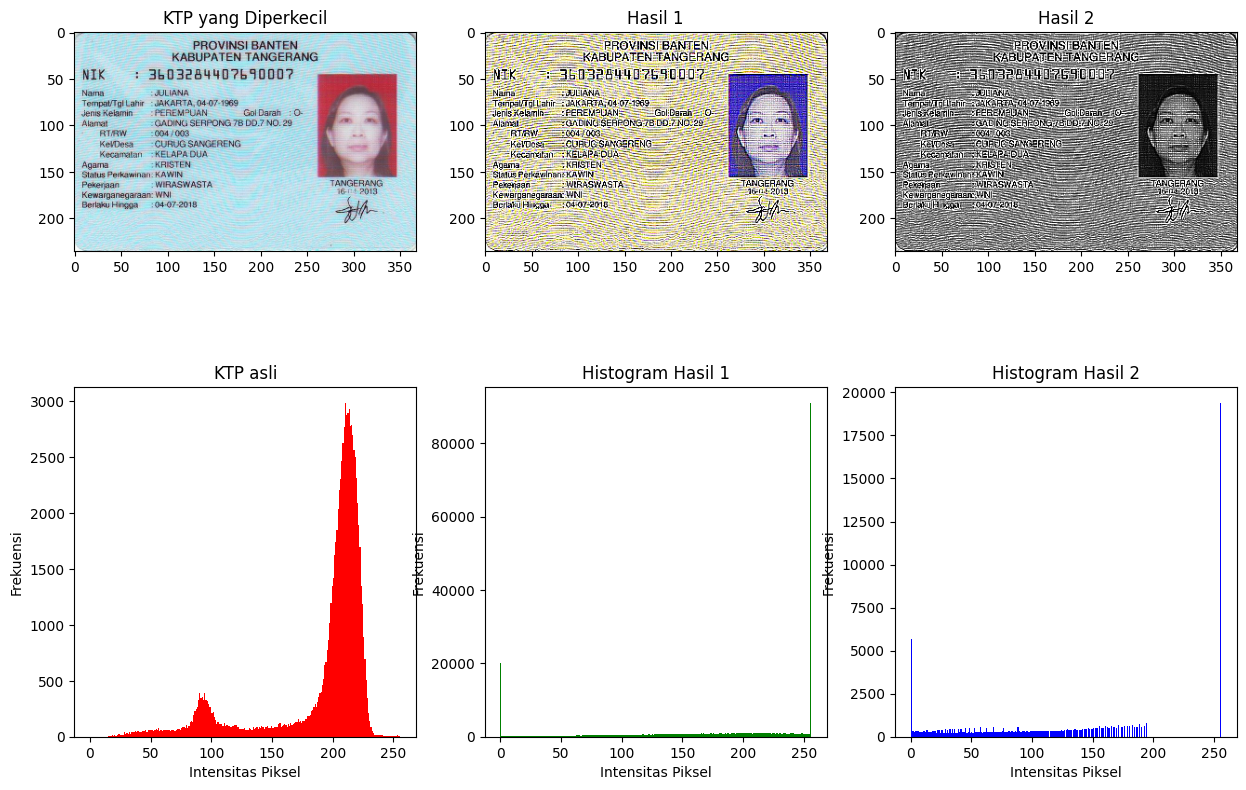

In [40]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Memuat gambar
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/ac4ab87e0bd7d61206e7e42cf6f71aa5.jpg')

# Fungsi untuk sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Fungsi untuk equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Meresize gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Menampilkan histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diberi efek sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Menampilkan histogram gambar yang sudah diberi efek sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Menampilkan histogram gambar yang sudah diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

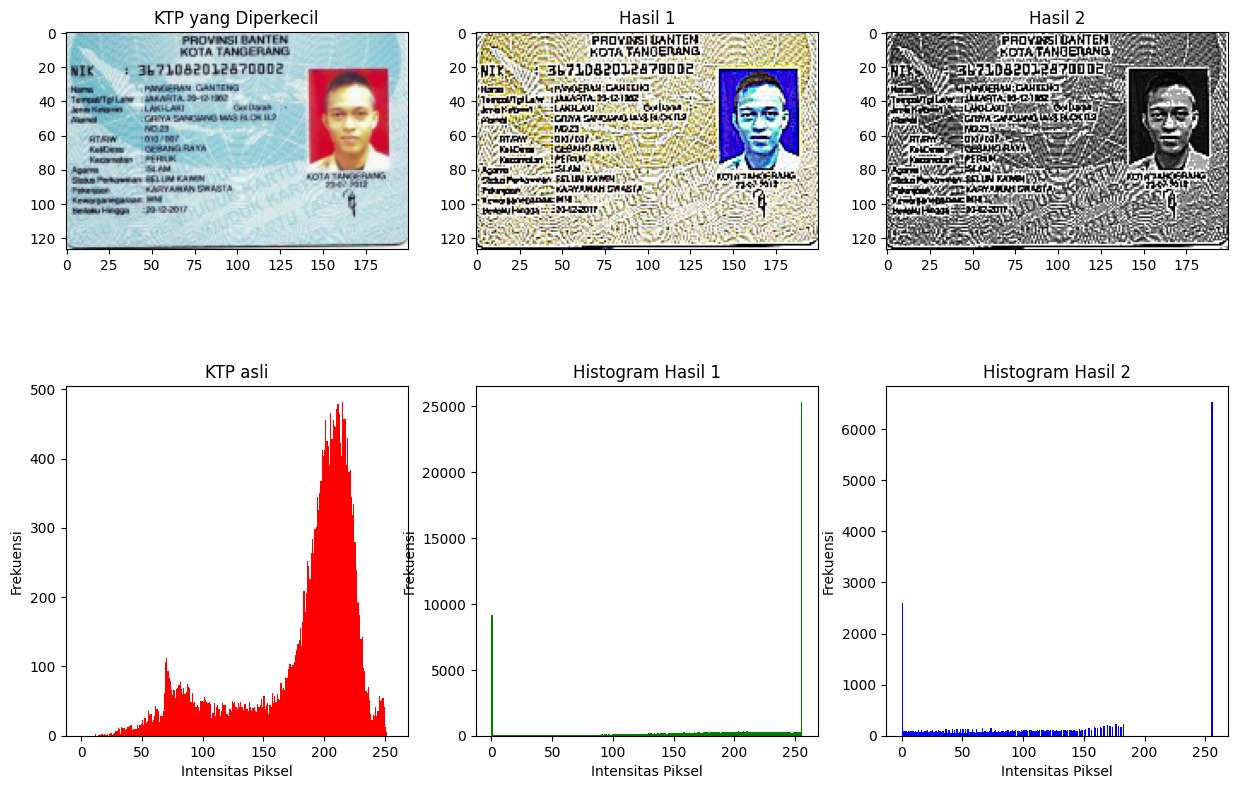

In [39]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Memuat gambar
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/PANGERAN GANTENG.jpg')

# Fungsi untuk sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Fungsi untuk equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Meresize gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Menampilkan histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diberi efek sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Menampilkan histogram gambar yang sudah diberi efek sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Menampilkan histogram gambar yang sudah diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

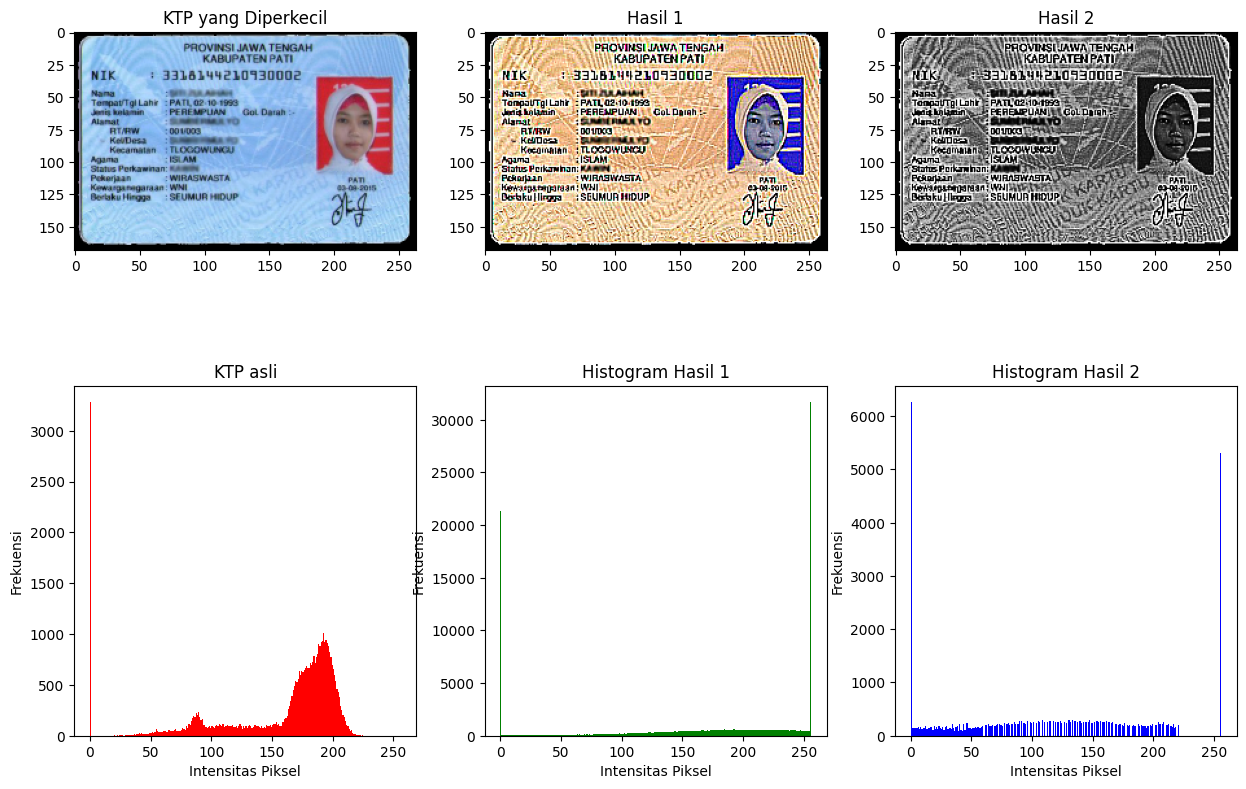

In [37]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Memuat gambar
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/contoh KTP.png')

# Fungsi untuk sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Fungsi untuk equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Meresize gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Menampilkan histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diberi efek sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Menampilkan histogram gambar yang sudah diberi efek sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Menampilkan histogram gambar yang sudah diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

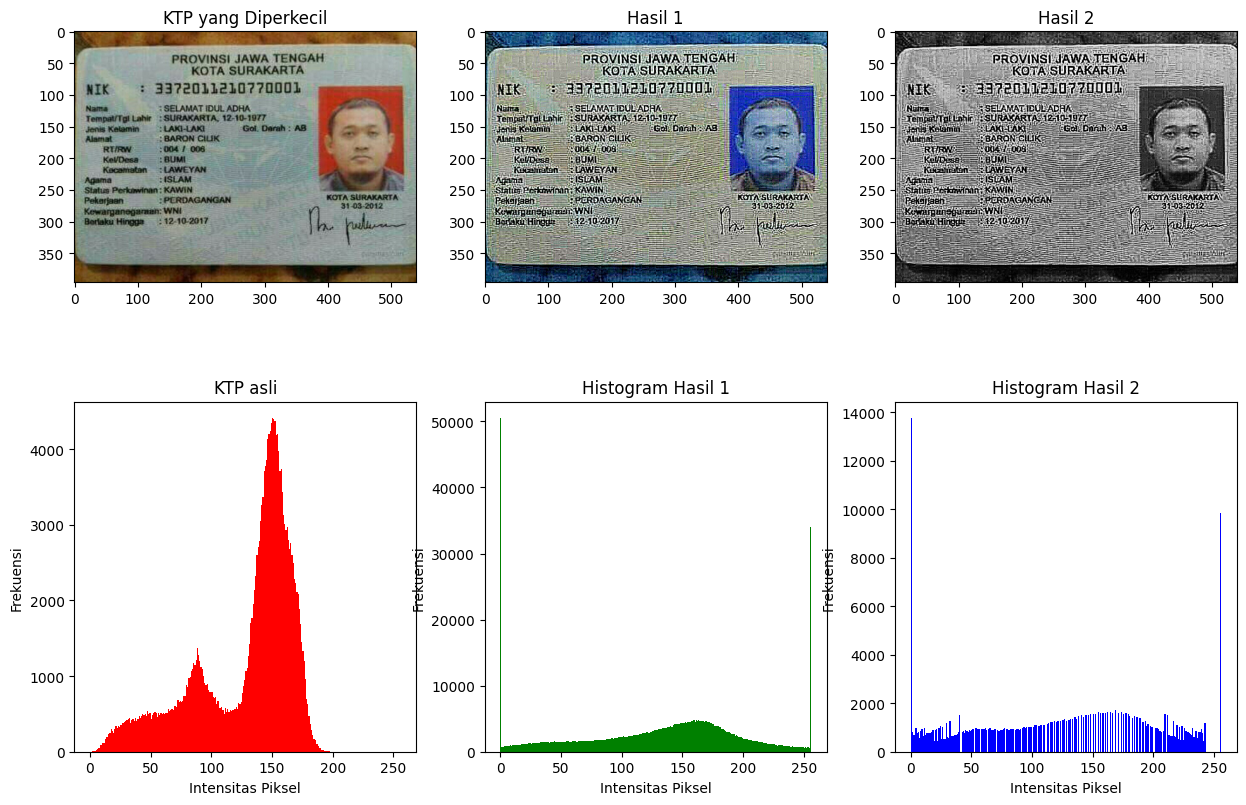

In [36]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Memuat gambar
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/39742489_2077271899269261_5933491701606776832_o.jpg')

# Fungsi untuk sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Fungsi untuk equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Meresize gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Menampilkan histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diberi efek sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Menampilkan histogram gambar yang sudah diberi efek sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Menampilkan histogram gambar yang sudah diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

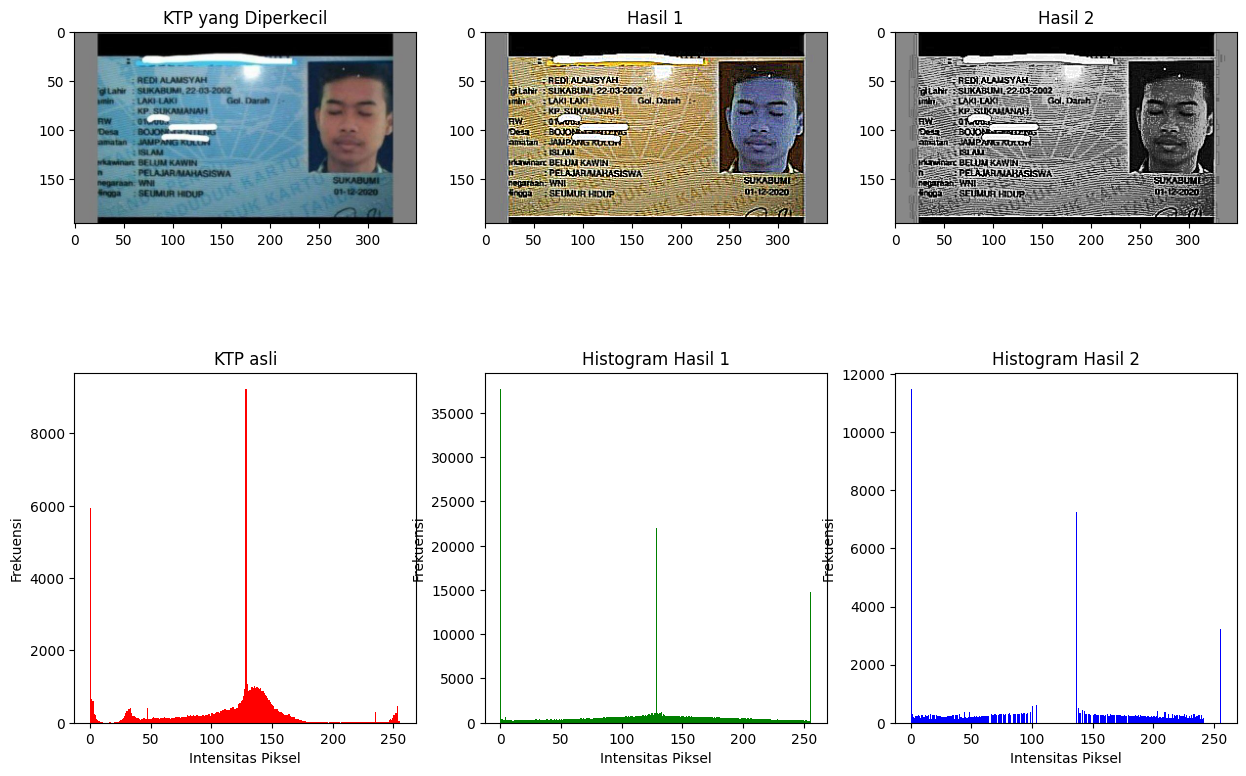

In [43]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Memuat gambar
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/ktp baru.jpg')

# Fungsi untuk sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Fungsi untuk equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Meresize gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Menampilkan histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diberi efek sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Menampilkan histogram gambar yang sudah diberi efek sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Menampilkan histogram gambar yang sudah diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

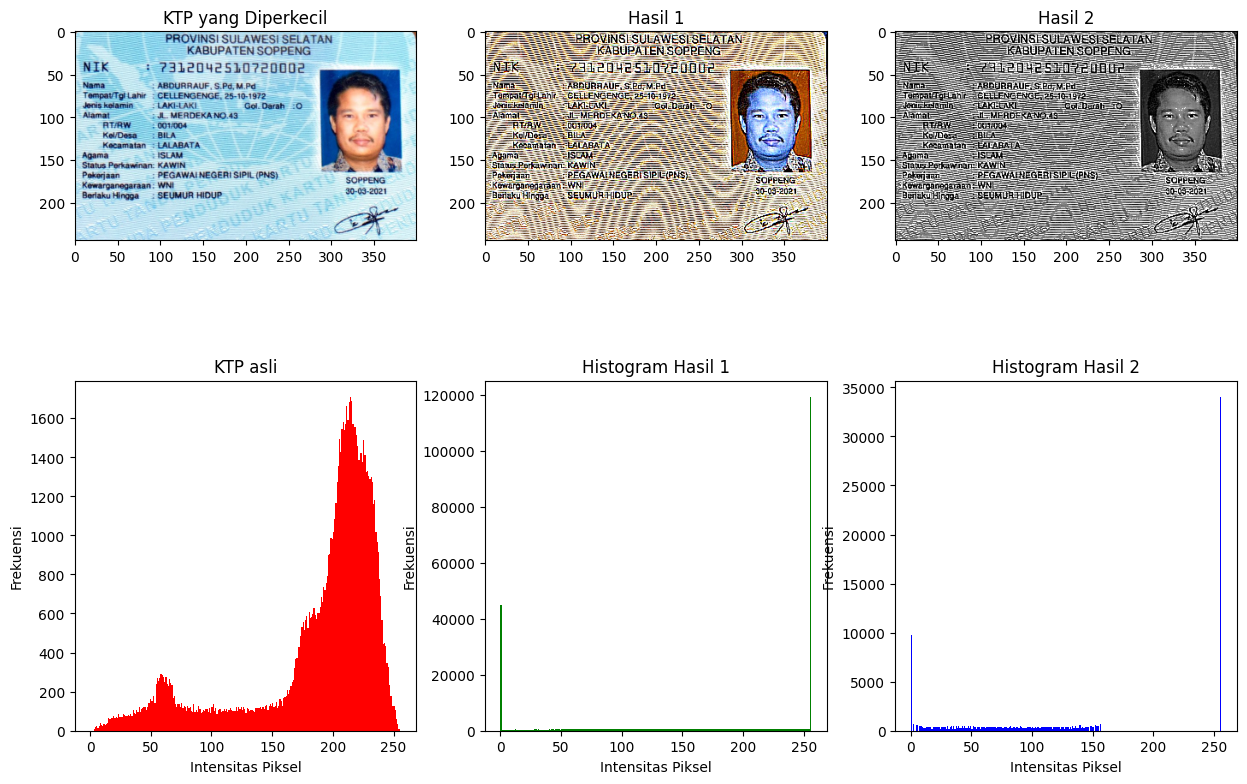

In [32]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Memuat gambar
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/ktp bapak.jpeg')

# Fungsi untuk sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Fungsi untuk equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Meresize gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Menampilkan histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diberi efek sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Menampilkan histogram gambar yang sudah diberi efek sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Menampilkan histogram gambar yang sudah diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

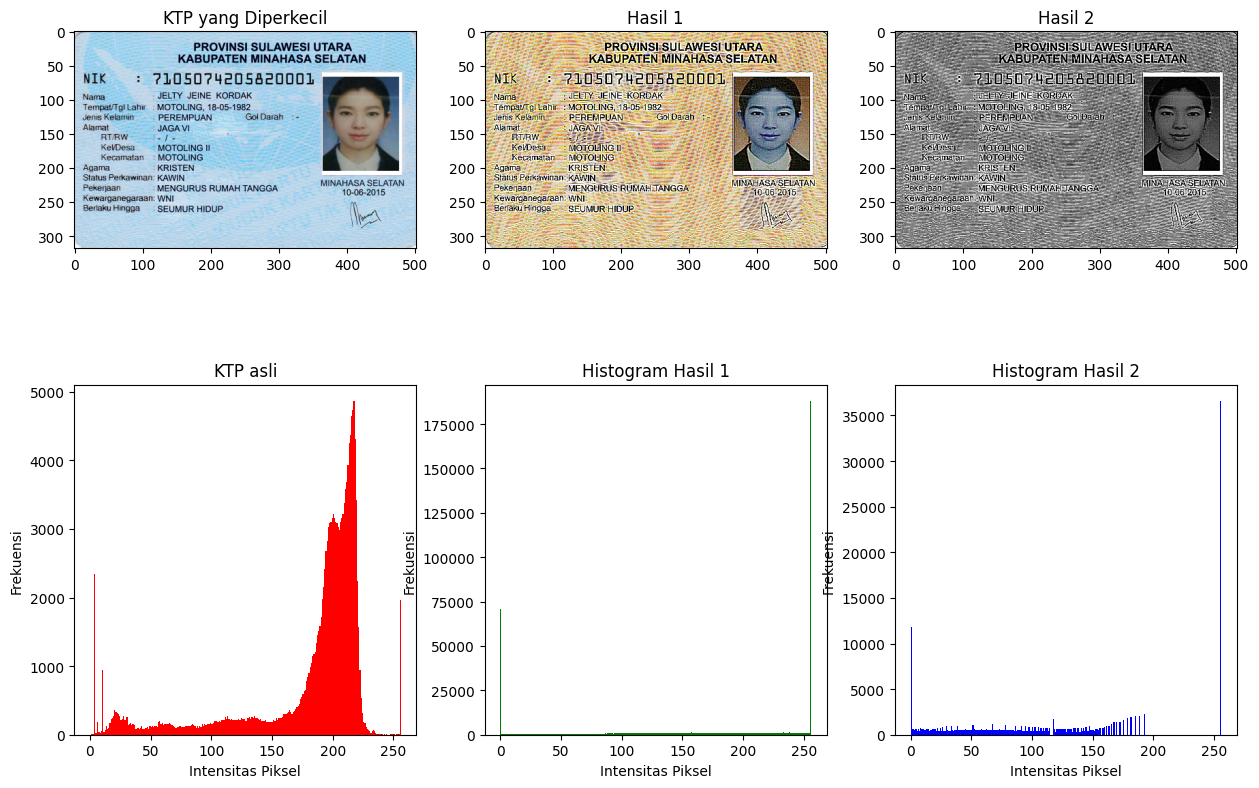

In [23]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Memuat gambar
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/katepe.png')

# Fungsi untuk sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Fungsi untuk equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Meresize gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Menampilkan histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diberi efek sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Menampilkan histogram gambar yang sudah diberi efek sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Menampilkan histogram gambar yang sudah diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

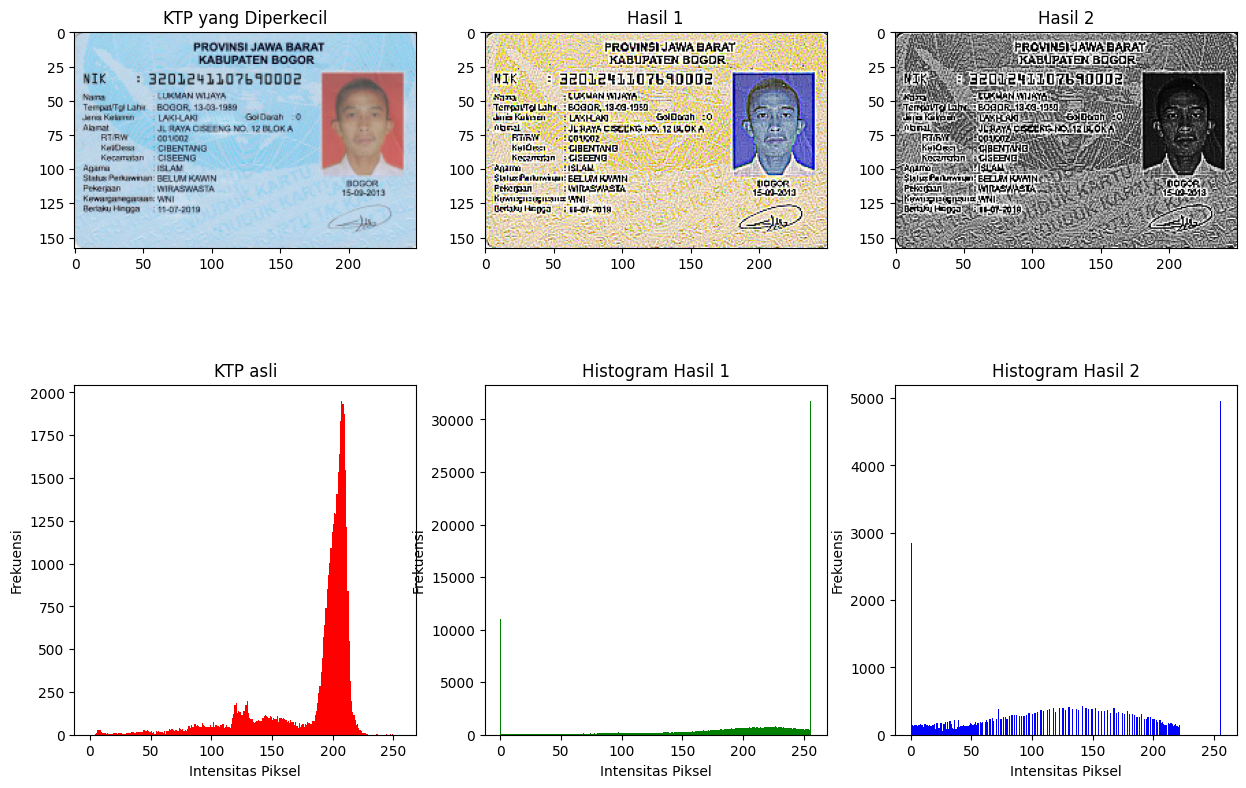

In [31]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Memuat gambar
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/unnamed.jpg')

# Fungsi untuk sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Fungsi untuk equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Meresize gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Menampilkan histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diberi efek sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Menampilkan histogram gambar yang sudah diberi efek sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Menampilkan histogram gambar yang sudah diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()